## Tau sweep Prev Choice Experiment

**Goal:** Run an experiment sweeping over tau values for the previous choice regressoer to determine what best fit tau for each animal is. 

Based on nll vs tau plots, can also start to infer if having a exponenital filter is better than not. Will confirm this in a later experiment with a model comparison. 

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sys
[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]

from fitting_utils import create_violation_interaction_pairs
from experiment_tau_sweep import ExperimentTauSweep
from design_matrix_generator import DesignMatrixGeneratorFilteredHistory
from multiclass_logistic_regression import MultiClassLogisticRegression
from model_visualizer import ModelVisualizerTauSweep

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
params = {
    "animals": None,
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "taus": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 25, 30],
    "random_state": 47,
    "tau_sweep": {
        "prev_violation": False,
        "prev_choice": True,
    },
    "model_config": {
        "tau_sweep_prev_choice": {
            "model_class": MultiClassLogisticRegression,
            "model_type": "multi",
            "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
            "design_matrix_generator_args": {"interaction_pairs": None},
        }
    },
}

In [29]:
experiment = ExperimentTauSweep(params)
experiment.run()
experiment.save(file_name="2023_11_08_tau_sweep_prev_choice.pkl")

returning viol dataset for all animals

 >>>> evaluating animal W051 sweeping taus of prev_choice <<<<

 ***** evaluating tau 1, sigma 0.07 *****
Optimization terminated successfully.
         Current function value: 41084.011770
         Iterations: 26
         Function evaluations: 35
         Gradient evaluations: 35

 ***** evaluating tau 1, sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 40685.842609
         Iterations: 24
         Function evaluations: 32
         Gradient evaluations: 32

 ***** evaluating tau 1, sigma 0.25 *****
Optimization terminated successfully.
         Current function value: 40498.755373
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 33

 ***** evaluating tau 1, sigma 0.5 *****
Optimization terminated successfully.
         Current function value: 40436.632497
         Iterations: 24
         Function evaluations: 32
         Gradient evaluations: 32

 ***** evaluating tau

### Visualize Results

In [30]:
mv = ModelVisualizerTauSweep(experiment)

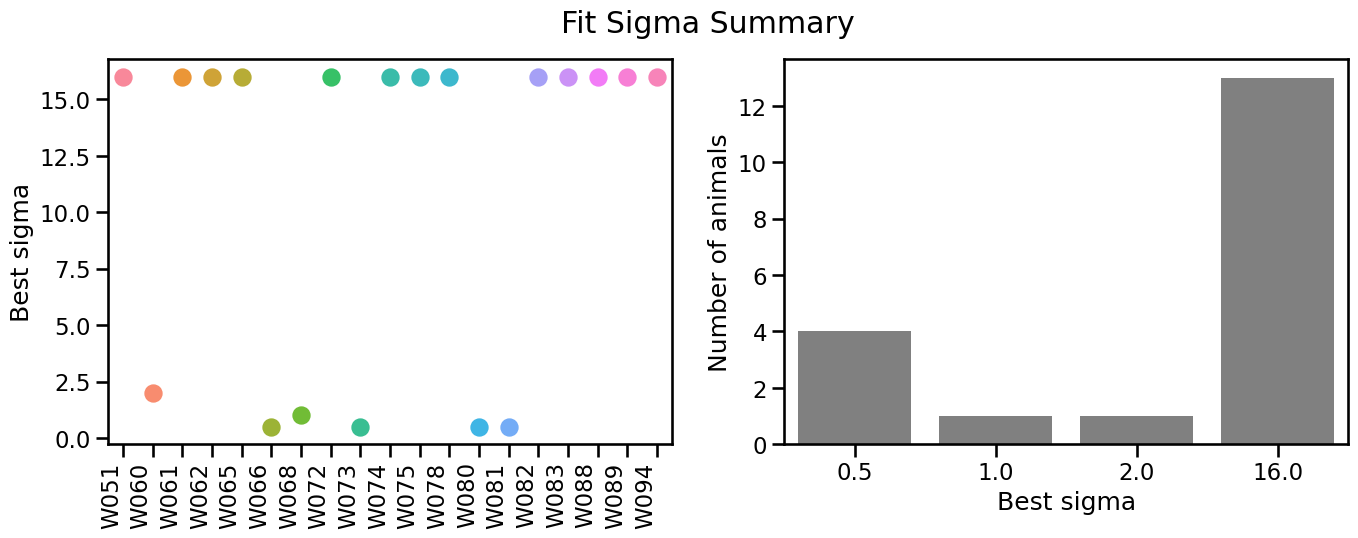

In [31]:
mv.plot_sigma_summary()

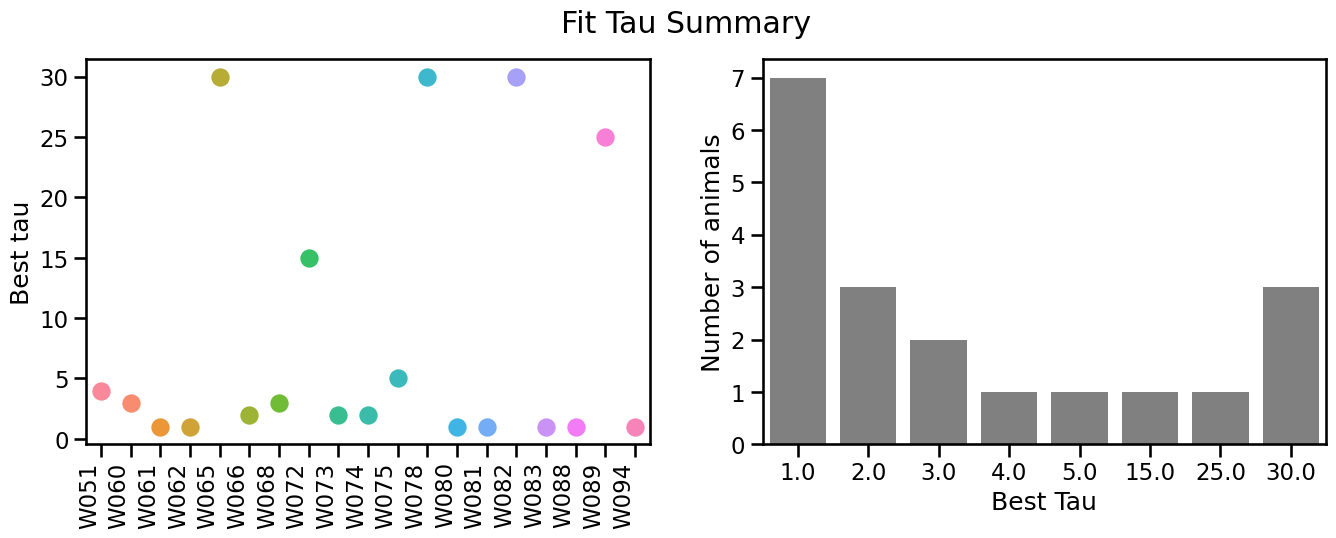

In [32]:
mv.plot_tau_summary()

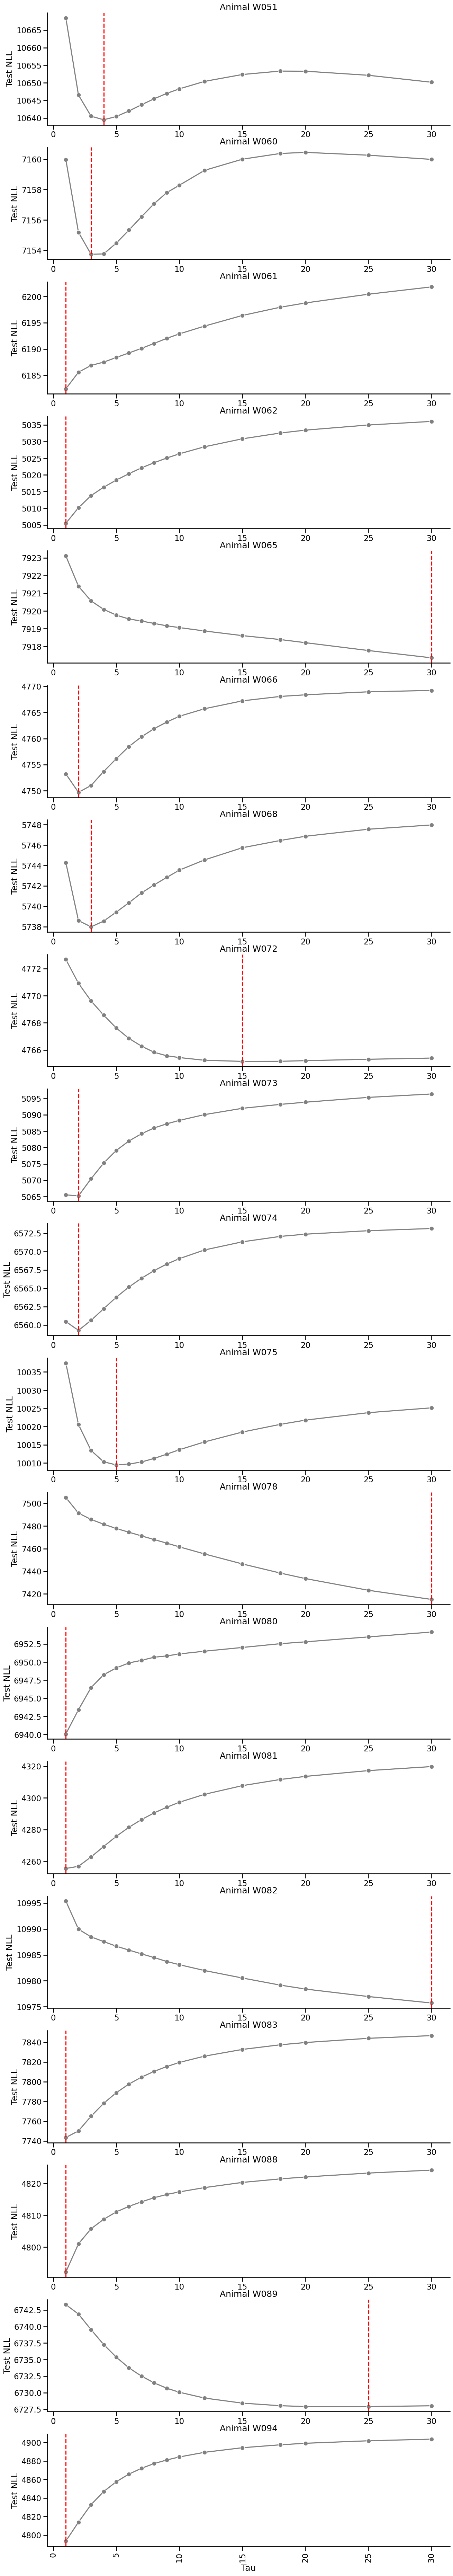

In [37]:
mv.plot_nll_over_taus_by_animal(group="tau", color="gray")

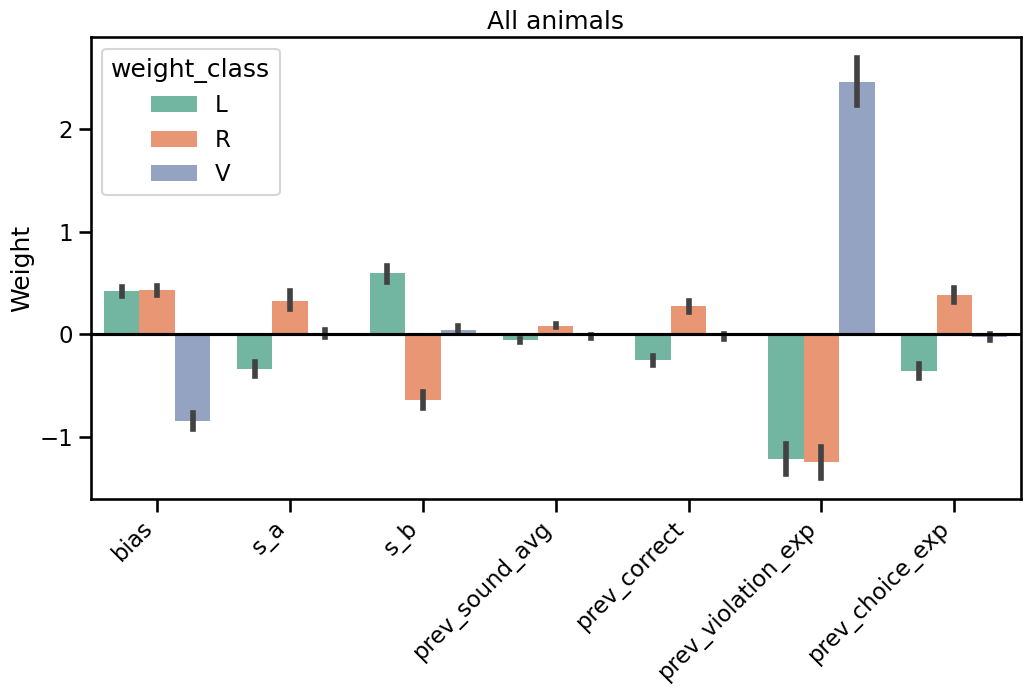

In [36]:
mv.plot_weights_summary(palette="Set2")

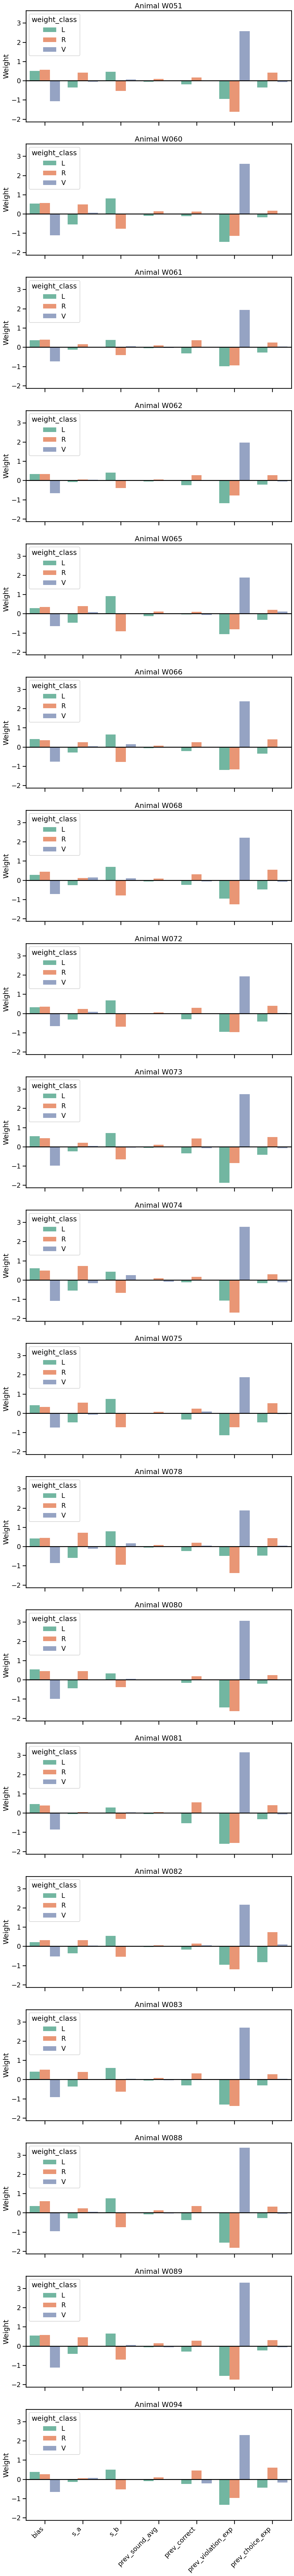

In [35]:
mv.plot_weights_by_animal(palette="Set2")